Final Exam- Classfication
Classfication: Cluster the (y=yes).

#Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv
Detailed Column Descriptions
bank client data:

1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",  
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")    
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")  
# related with the last contact of the current campaign:   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

Steps
1. Convert Categorical values to 0, 1
2. Create Training and Testing data, and check class distribution
3. Stratified Sampling
4. Classification Models


In [1]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_excel('BankTrain.xlsx')

data0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data0.isnull().sum()  # get the number of missing data points per column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data0.shape

(45211, 17)

In [5]:
data0.head().transpose() 

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [6]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
cat_vars = ['poutcome', 'y', 'contact', 'job', 'default','month', 'marital','housing', 'loan']

In [8]:
data0.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

no     39922
yes     5289
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

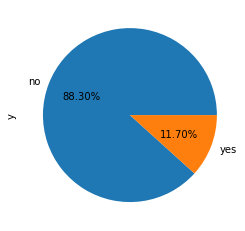

In [9]:
print(data0['y'].value_counts(normalize=False))
data0['y'].value_counts().sort_index().plot(kind='pie', autopct='%1.2f%%')

In [10]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
#data0["y"] = data0["y"].apply(lambda x: 1 if x == "yes" else 0) #apply() apply a if function to transform Attrition from Yes/No to 1/0. 

In [12]:
cat_cols = data0.select_dtypes(include=object).columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
data0['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

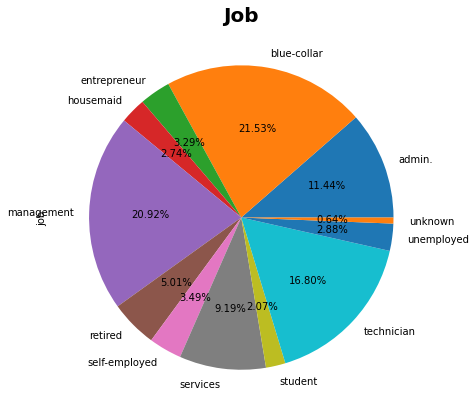

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


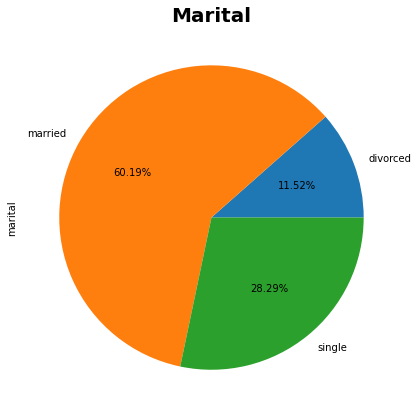

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


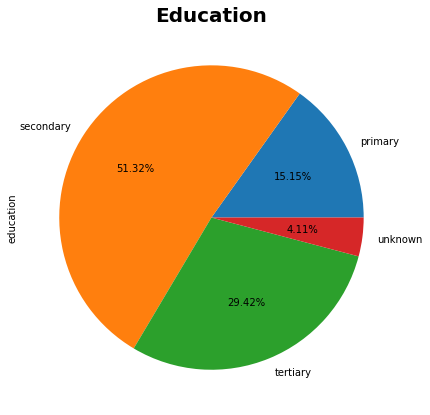

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


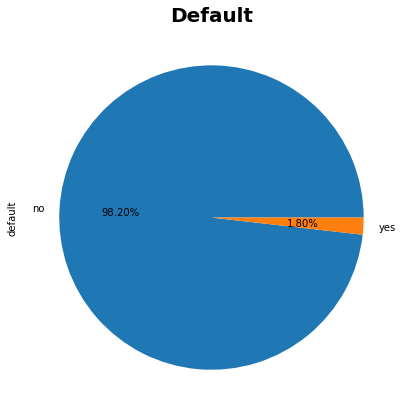

no     44396
yes      815
Name: default, dtype: int64


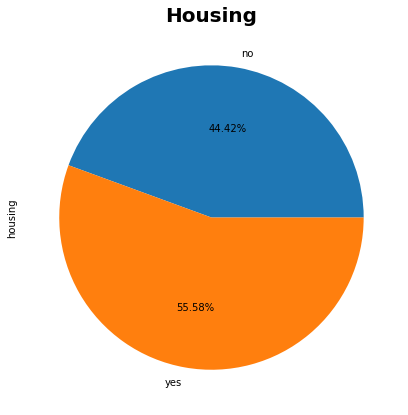

yes    25130
no     20081
Name: housing, dtype: int64


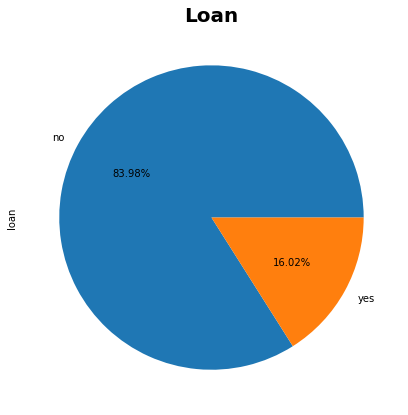

no     37967
yes     7244
Name: loan, dtype: int64


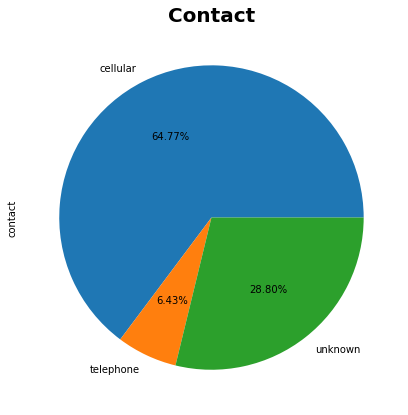

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


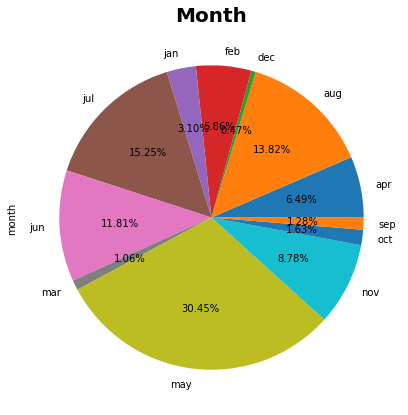

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


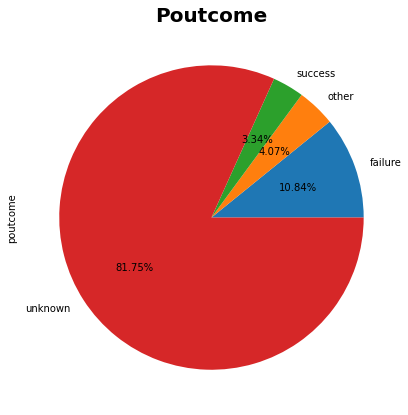

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


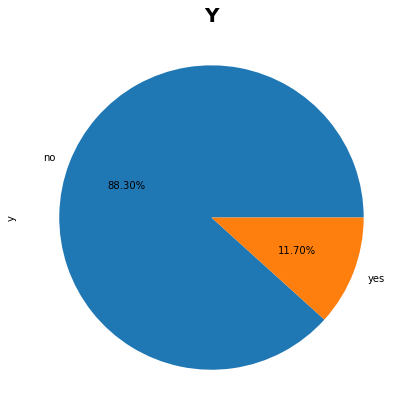

no     39922
yes     5289
Name: y, dtype: int64


In [14]:
from final_exam_functions import print_cat_pie
print_cat_pie(data0)

In [15]:
a=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=True))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))

b=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=False))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))
b
#result =  a.merge(b, on=['column', 'counts'], how='left')

counts
column    value                
contact   telephone        2906
          unknown         13020
          cellular        29285
default   yes               815
          no              44396
education unknown          1857
          primary          6851
          tertiary        13301
          secondary       23202
housing   no              20081
          yes             25130
job       unknown           288
          student           938
          housemaid        1240
          unemployed       1303
          entrepreneur     1487
          self-employed    1579
          retired          2264
          services         4154
          admin.           5171
          technician       7597
          management       9458
          blue-collar      9732
loan      yes              7244
          no              37967
marital   divorced         5207
          single          12790
          married         27214
month     dec               214
          mar               477
          sep               579
          oct               738
          jan              1403
          feb              2649
          apr              2932
          nov              3970
          jun              5341
          aug              6247
          jul              6895
          may             13766
poutcome  success          1511
          other            1840
          failure          4901
          unknown         36959
y         yes              5289
          no              39922

## Convert Categorical values to 0, 1

In [16]:
data_class = data0.copy()

In [17]:
data_class['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [18]:
cat_cols = data_class.select_dtypes(include=object).columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [20]:
from final_exam_functions import cat_to_dummy
cat_cols = data_class.select_dtypes(include=object).columns.tolist()
cat_cols.remove('y')
data_class=cat_to_dummy(data_class, cat_cols) #Convert categorical values to 0/1. Used for classification & numeric prediction   
data_class.head().transpose()

,0,1,2,3,4
age,58,44,33,47,33
balance,2143,29,2,1506,1
day,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
y,no,no,no,no,no
job_admin.,0,0,0,0,0
job_blue-collar,0,0,0,1,0


In [21]:
data_class['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [22]:
data_class["y"] = data_class["y"].apply(lambda x: 1 if x == "yes" else 0) #apply() apply a if function to transform Attrition from Yes/No to 1/0. 
data_class['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [23]:
from final_exam_functions import stratified_sample

X_train, X_test, y_train, y_test = stratified_sample(data_class,'y',0.8)

print('Class Distribution:',y_test.value_counts()/len(y_test))

Class Distribution: 0    0.88299
1    0.11701
Name: y, dtype: float64


In [24]:
data_class.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.114375,0.215257,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.318269,0.411005,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train.head().transpose() 

11619    1
25561    1
35264    1
43716    1
44962    1
Name: y, dtype: int64

In [26]:
y_train.describe()

count    36169.000000
mean         0.116979
std          0.321399
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [27]:
##Classification --- Classification Tree¶

Classification tree accuracy for test set: 0.8998009289980093

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7984
           1       0.62      0.37      0.47      1058

    accuracy                           0.90      9042
   macro avg       0.77      0.67      0.71      9042
weighted avg       0.89      0.90      0.89      9042


Feature Importance:
 [3.46156726e-02 1.04926154e-02 3.51627713e-02 4.59569782e-01
 6.70625376e-03 5.07288357e-02 3.67734390e-03 1.21839032e-03
 0.00000000e+00 0.00000000e+00 7.40833799e-04 4.69950552e-04
 0.00000000e+00 5.41732436e-04 9.51940699e-04 5.02287381e-04
 2.20783170e-03 0.00000000e+00 0.00000000e+00 6.31668060e-04
 3.00417035e-03 9.99474121e-04 7.36572745e-04 6.50078923e-04
 1.71272950e-03 1.05745693e-03 2.25625567e-03 0.00000000e+00
 4.55215777e-02 3.20864631e-03 1.03397082e-03 0.00000000e+00
 3.29296005e-03 3.35057338e-04 8.39184778e-03 2.23857697e-02
 0.00000000e+00

duration               0.459570
poutcome_success       0.228208
pdays                  0.050729
housing_no             0.045522
month_mar              0.041419
day                    0.035163
age                    0.034616
month_apr              0.022386
balance                0.010493
month_oct              0.010254
contact_unknown        0.008392
month_may              0.007239
campaign               0.006706
previous               0.003677
month_sep              0.003661
contact_cellular       0.003293
housing_yes            0.003209
marital_married        0.003004
month_feb              0.002587
default_no             0.002256
job_technician         0.002208
education_tertiary     0.001713
month_dec              0.001602
job_admin.             0.001218
education_unknown      0.001057
loan_no                0.001034
marital_single         0.000999
job_services           0.000952
month_nov              0.000912
job_housemaid          0.000741
education_primary      0.000737
month_ju

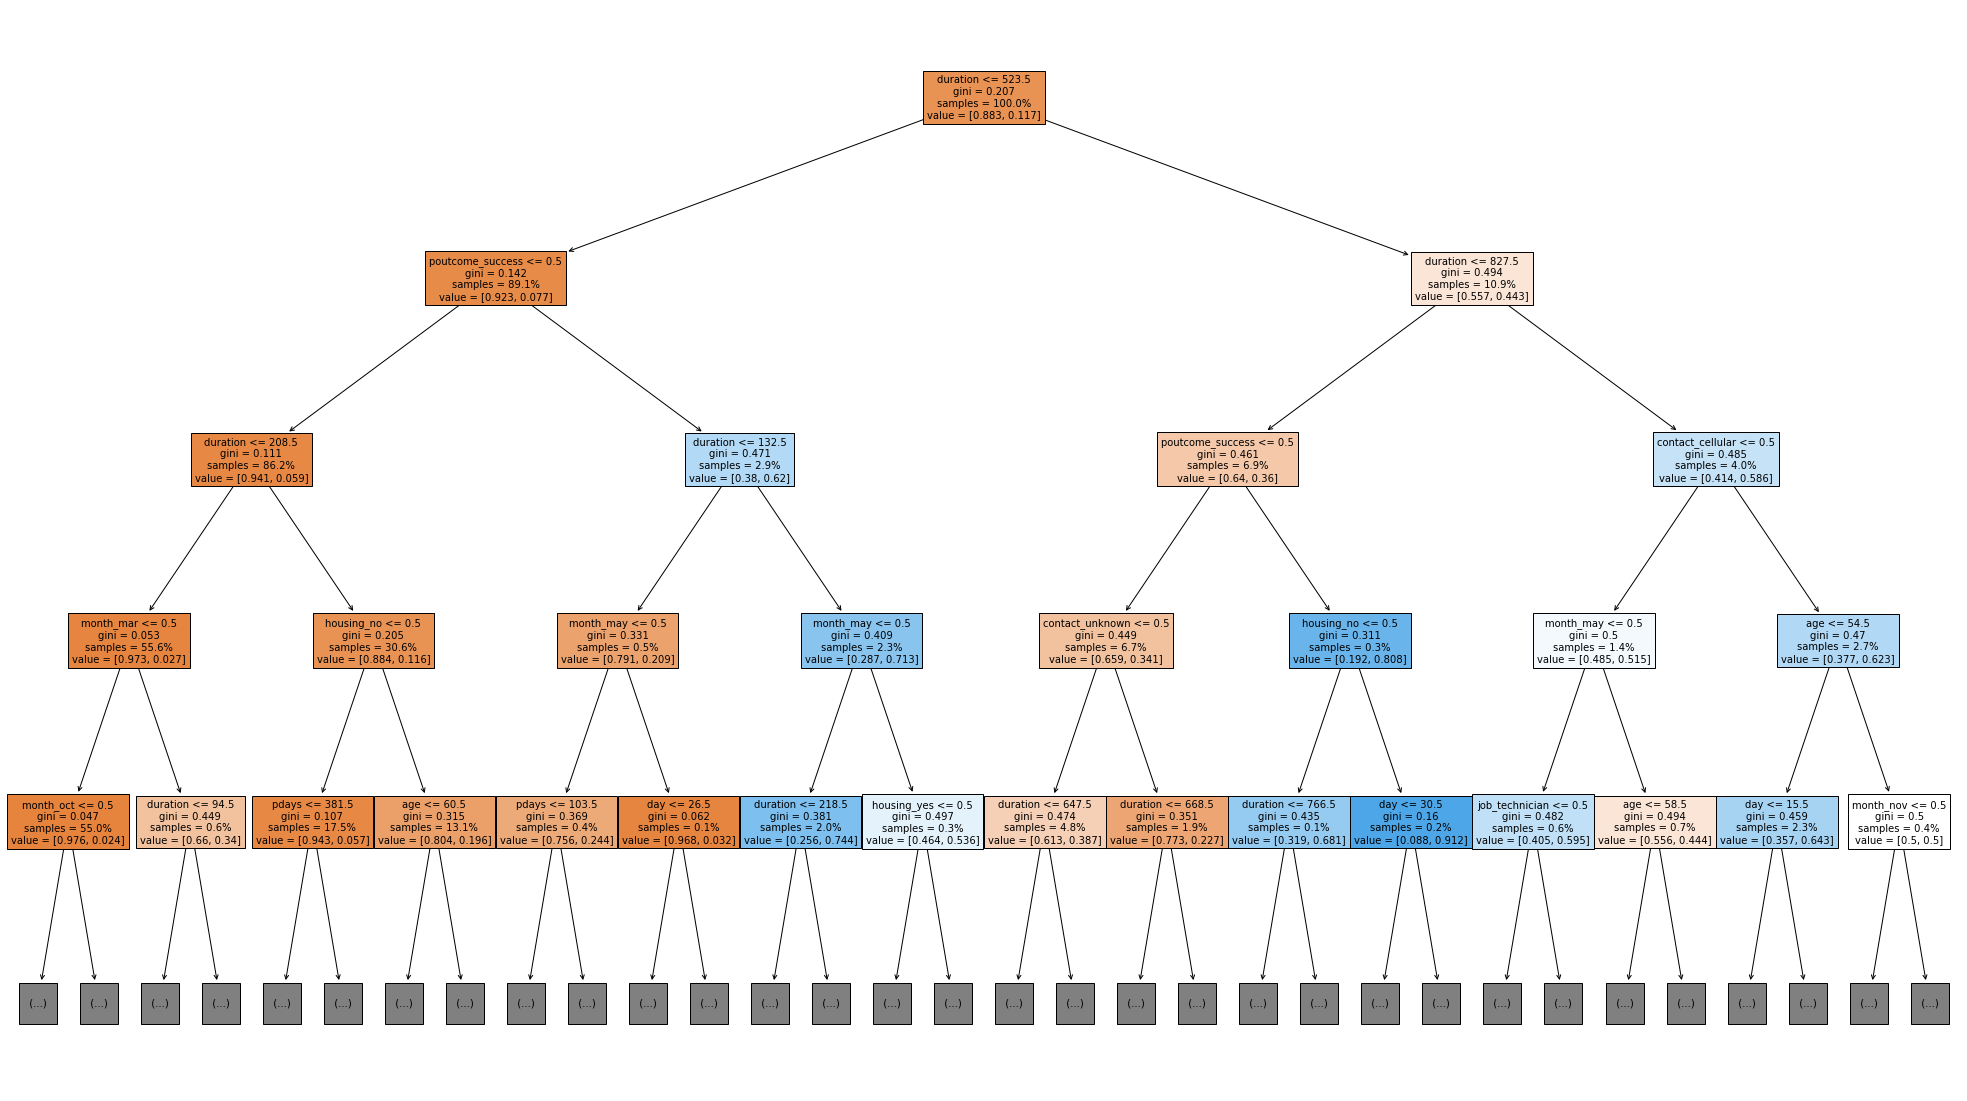

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text #Print the tree in text, since the graphical tree is too big to see the leaf nodes

model = DecisionTreeClassifier() 
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]}) 
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)

class_tree_report  = classification_report(y_test, y_pred_dt)
class_tree_score_dt =   dt.score(X_test, y_test)

print("Classification tree accuracy for test set:", class_tree_score_dt) 
print("\nClassification report:\n", class_tree_report)
print("\nFeature Importance:\n",dt.best_estimator_.feature_importances_)
print(X_train.columns)
result1 = pd.DataFrame(index=X_train.columns)
result1['feature_importances']=dt.best_estimator_.feature_importances_
print("\nFeature Importance:\n")
display(result1['feature_importances'].sort_values(ascending=False))
cf_matrix_dtc = confusion_matrix(y_test, y_pred_dt) 
plt.subplots(figsize=(35, 20)) 
plot_tree(dt.best_estimator_, max_depth=4, feature_names=X_train.columns, filled=True, proportion=True, fontsize=10) 
plt.show()

In [30]:
string1=export_text(dt.best_estimator_,feature_names=X_train.columns.to_list(),show_weights=True)

file1=open('FinalExam_Results_Text_Tree.txt','w')
file1.write(string1)
file1.close()

In [31]:
##Classification --- Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_accuracy = logreg.score(X_test, y_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_log))
print('Intercept:',logreg.best_estimator_.intercept_)
print('\nCoefficients:\n',logreg.best_estimator_.coef_)
print(X_train.columns)
cf_matrix_lr = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix(y_test, y_pred_log))

Logistic regression accuracy for test set: 0.889294403892944

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7984
           1       0.57      0.22      0.32      1058

    accuracy                           0.89      9042
   macro avg       0.74      0.60      0.63      9042
weighted avg       0.87      0.89      0.87      9042

Intercept: [-0.27702042]

Coefficients:
 [[-1.98794437e-02  2.04552073e-05 -1.19921083e-02  3.84574409e-03
  -4.04803924e-01  2.62517172e-03 -1.12959042e-01 -2.57291003e-02
  -2.38299809e-01 -2.85119012e-02 -1.09324688e-02  9.95000139e-03
   1.55438367e-01 -1.60728992e-02 -8.60833353e-02  2.23682997e-02
  -6.87129440e-02  7.48277195e-03  2.11484030e-03  1.92993372e-02
  -1.68496576e-01 -1.27790939e-01 -7.40033485e-02 -2.59623123e-01
   4.24281093e-02  1.42101849e-02 -2.57930028e-01 -1.90581491e-02
   3.36814012e-01 -6.13802189e-01 -8.76093840e-02 -1.89378793e-01
   7.51019290e-02 

In [34]:
##Classification --- Random Forest¶

In [35]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
Random_forest_accuracy = rf.score(X_test, y_test)
print("Random forest accuracy for test set:", rf.score(X_test, y_test))
cf_matrix_random = confusion_matrix(y_test, y_pred_rf)
print("\nClassification report:\n",classification_report(y_test, y_pred_rf))

Random forest accuracy for test set: 0.8984737889847378

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7984
           1       0.76      0.20      0.31      1058

    accuracy                           0.90      9042
   macro avg       0.83      0.59      0.63      9042
weighted avg       0.89      0.90      0.87      9042



## Comparsion Random Forest, Logistic Regression and DecisionTreeClassifier   
DecisionTreeClassifier is the best: accuracy = 90% and Recall = .380 and F1 score = .472   
Features importance: duration   of call (0.459247) and poutcome_success  (0.2280120
pdays                  0.049476

In [36]:
print(Random_forest_accuracy)

0.8984737889847378


In [37]:
print(log_accuracy)

0.889294403892944


In [38]:
print(class_tree_score_dt)

0.8998009289980093


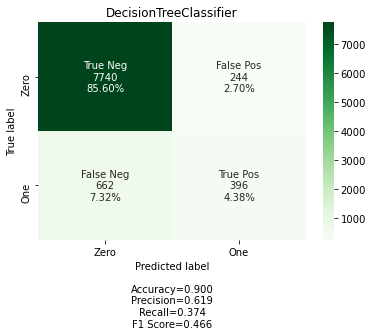

In [39]:
from final_exam_functions import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_dtc, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Greens',
                      title="DecisionTreeClassifier")

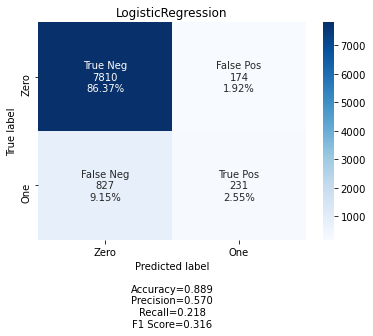

In [40]:
from final_exam_functions import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_lr, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      title="LogisticRegression")

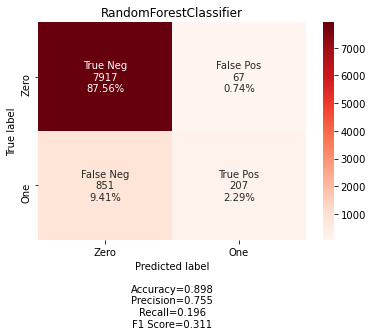

In [41]:
from final_exam_functions import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix_random, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds',
                      title="RandomForestClassifier")